In [6]:
import nltk

In [7]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\shpim\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shpim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# Zipf’s Law

```
font 설정
MAC OS = /Library/Fonts/.ttf
WINDOWS = C:\Windows\Fonts\ .ttc or .tt
```

In [52]:
from matplotlib import font_manager, rc

path = 'C:/Windows/Fonts/malgun.ttf'
family = font_manager.FontProperties(fname=path).get_name()
rc('font', family=family)

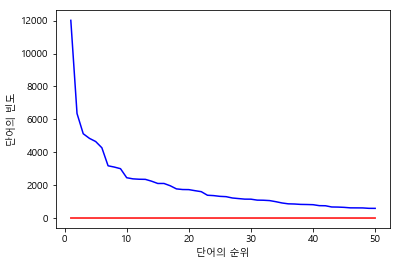

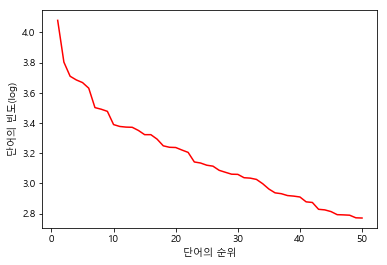

In [53]:
from nltk import Text
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import math

corpus = gutenberg.open(gutenberg.fileids()[0]).read()

tokens = word_tokenize(corpus)
textObj = Text(tokens)

x = range(1, 51)
y = [row[1] for row in textObj.vocab().most_common(50)]
yy = [math.log10(_) for _ in y]

plt.plot(x, y, "b-")
plt.plot(x, yy, "r-")
plt.xlabel("단어의 순위")
plt.ylabel("단어의 빈도")
plt.show()

plt.plot(x, yy, "r-")
plt.xlabel("단어의 순위")
plt.ylabel("단어의 빈도(log)")
plt.show()

In [15]:
textObj.vocab().most_common(50)[0][1]

12016

In [16]:
for row in textObj.vocab().most_common(50):
    print(row[1])

12016
6355
5125
4844
4653
4272
3177
3100
3001
2452
2383
2360
2353
2242
2103
2103
1965
1774
1735
1729
1664
1605
1387
1365
1320
1301
1221
1185
1151
1148
1091
1084
1063
996
918
866
855
831
824
813
755
748
674
668
651
621
619
616
592
590


In [54]:
from konlpy.corpus import kolaw, kobill

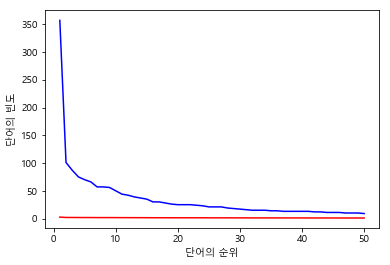

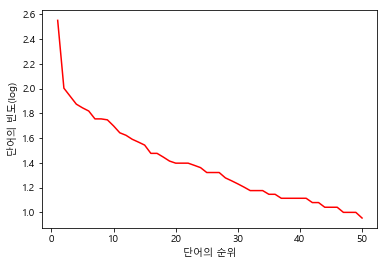

In [55]:
from nltk import Text
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import math

corpus = kolaw.open(kolaw.fileids()[0]).read()

tokens = word_tokenize(corpus)
textObj = Text(tokens)

x = range(1, 51)
y = [row[1] for row in textObj.vocab().most_common(50)]
yy = [math.log10(_) for _ in y]

plt.plot(x, y, "b-")
plt.plot(x, yy, "r-")
plt.xlabel("단어의 순위")
plt.ylabel("단어의 빈도")
plt.show()

plt.plot(x, yy, "r-")
plt.xlabel("단어의 순위")
plt.ylabel("단어의 빈도(log)")
plt.show()

In [35]:
from nltk import Text
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import math
import os, sys

corpus = kolaw.open(kolaw.fileids()[0]).read()

path = "../data"
fileList = []
for file in os.listdir(path):
    if file.endswith(".txt"):
#         fileList.append(file)
        with open("{0}/{1}".format(path, file), encoding="utf-8") as f:
            corpus += f.read()

        tokens = word_tokenize(corpus)
        textObj = Text(tokens)

        x = range(1, 51)
        y = [row[1] for row in textObj.vocab().most_common(50)]
        yy = [math.log10(_) for _ in y]

# plt.plot(x, y, "b-")
# plt.plot(x, yy, "r-")
# plt.xlabel("단어의 순위")
# plt.ylabel("단어의 빈도")
# plt.show()

# plt.plot(x, yy, "r-")
# plt.xlabel("단어의 순위")
# plt.ylabel("단어의 빈도(log)")
# plt.show()

In [36]:
textObj.vocab().most_common()[-20:]

[('처리하겠다는', 1),
 ('비판과', 1),
 ('넘어설지가', 1),
 ('앞으로의', 1),
 ('관건이다', 1),
 ('촉구', 1),
 ('기자회견', 1),
 ('손학규', 1),
 ('두번째부터', 1),
 ('정동영', 1),
 ('이정미', 1),
 ('홍대', 1),
 ('촉구를', 1),
 ("'1만", 1),
 ('·청소년', 1),
 ('서명운동', 1),
 ('선포', 1),
 ("기자회견'을", 1),
 ('있다.2019.2.18', 1),
 ('charge', 1)]

# Heaps' Law

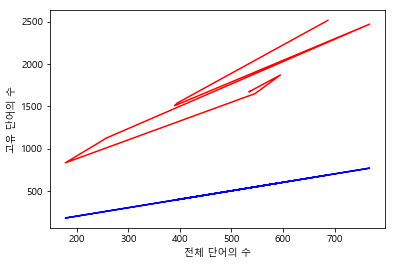

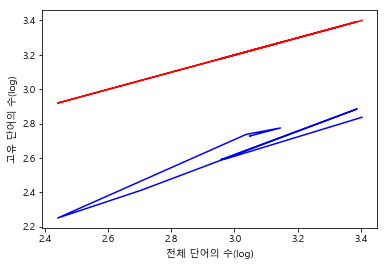

In [56]:
from konlpy.corpus import kobill

k = 50
b = 0.5
x = []
y = []
yy = []
logX = []
logY = []
logYY = []
corpus =""

# corpus = gutenberg.open(gutenberg.fileids()[0]).read()
for file in kobill.fileids():
    corpus = kobill.open(file).read()
    tokens = word_tokenize(corpus)
    textObj = Text(tokens)

    x.append(len(set(textObj))) 
    y.append(k * len(textObj)**b)
    yy.append(len(set(textObj)))
    
    logX.append(math.log10(len(textObj)))
    logY.append(math.log10(k) + math.log10(len(textObj))*b)
    logYY.append(math.log10(len(set(textObj))))

plt.plot(x, y, "r-")
plt.plot(x, yy, "b-")
plt.xlabel("전체 단어의 수")
plt.ylabel("고유 단어의 수")
plt.show()

plt.plot(logX, logY,"r-")
plt.plot(logX, logYY, "b-")
plt.xlabel("전체 단어의 수(log)")
plt.ylabel("고유 단어의 수(log)")
plt.show()